<h1> Project by Michael Moore</h1>
<p> <b>Title: Linear Regression</b> </p>

<p> Objective:<br>
<ol>
<li>What are the factors that influence the number of bikes rented?</li>

<li>Explore the data for outliers and missing values.</li>
<li>Plot the correlation between the variables and state your comments</li>
<li>Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.</li>
<li>Coment on Model performance by using approapriate diagnostics and measures.</li>
</ol>


Observation:
<p> Based on the data provided by the "SeoulBikeData.csv" file, the fearures that seems to play a big factor on the Rented Bike Count are <b> "Temperature" </b> and <b> "Hour". </b></p><p>Temperature has a linear relation... even though the correlation is only <i>0.324484</i> it seems like the higher the temperature is the more chances people would rent a bike. Althogh that is true <b>Temperature</b> have a more consistant renting number around the mean which was <i>19.3(c)</i> <a href="https://colab.research.google.com/drive/18DHcLBeLm1Fm-eqL0n9dRJfFk8Xy3Cfe#scrollTo=ZspeDMLJvVsg&line=5&uniqifier=1">click here</a> for more observations</p> After analyzing the data more i was curious of even though rainfall and snowfall are not linear compared to the bike count lets see how it'll change the data.You can check out the results from <a href="https://colab.research.google.com/drive/18DHcLBeLm1Fm-eqL0n9dRJfFk8Xy3Cfe#scrollTo=ZvlOTOnTYScC&line=2&uniqifier=1"> Trail One </a> and see how adding the rain and snow effected it <a href="">Trail Two</a> Lastly for <a href="https://colab.research.google.com/drive/18DHcLBeLm1Fm-eqL0n9dRJfFk8Xy3Cfe#scrollTo=Q--kQHMok6Pa&line=2&uniqifier=1">Trail Three</a> i added Dew Temperature  and Visibility along with the oringinal hour and temperature to determine Bike Count

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
%matplotlib inline




In [2]:
#read file and convert it to a dataframe(df)

file = "data/SeoulBikeData.csv"
data = pd.read_csv(file)
data.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
data.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%            0.900000        940.000000                 -4.700000   
50%            1.500000       1698.000000                  5.100000   
75%            2.300000       2000.000000                 14.800000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
df = data.copy()

In [6]:
# print("test data shape",df_test.shape)
print("population data shape",df.shape)

population data shape (8760, 14)


In [7]:
df.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### EDA 

In [8]:
#find null values in df
num_null = df.isna().sum()
s=0
for item in num_null.items():
    s += item[1]

if s == 0:
    print("There are no feature with an observation with null data")
else:
    print(num_null)

There are no feature with an observation with null data


#### Potential Outliers 

In [9]:
df.corr()

Rented Bike Count      Hour  Temperature(C)  \
Rented Bike Count                  1.000000  0.410257        0.538558   
Hour                               0.410257  1.000000        0.124114   
Temperature(C)                     0.538558  0.124114        1.000000   
Humidity(%)                       -0.199780 -0.241644        0.159371   
Wind speed (m/s)                   0.121108  0.285197       -0.036252   
Visibility (10m)                   0.199280  0.098753        0.034794   
Dew point temperature(C)           0.379788  0.003054        0.912798   
Solar Radiation (MJ/m2)            0.261837  0.145131        0.353505   
Rainfall(mm)                      -0.123074  0.008715        0.050282   
Snowfall (cm)                     -0.141804 -0.021516       -0.218405   

                          Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count           -0.199780          0.121108          0.199280   
Hour                        -0.241644          0.285197          0.098753   
Temperature(C)               0.159371         -0.036252          0.034794   
Humidity(%)                  1.000000         -0.336683         -0.543090   
Wind speed (m/s)            -0.336683          1.000000          0.171507   
Visibility (10m)            -0.543090          0.171507          1.000000   
Dew point temperature(C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)     -0.461919          0.332274          0.149738   
Rainfall(mm)                 0.236397         -0.019674         -0.167629   
Snowfall (cm)                0.108183         -0.003554         -0.121695   

                          Dew point temperature(C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                         0.379788                 0.261837   
Hour                                      0.003054                 0.145131   
Temperature(C)                            0.912798                 0.353505   
Humidity(%)                               0.536894                -0.461919   
Wind speed (m/s)                         -0.176486                 0.332274   
Visibility (10m)                         -0.176630                 0.149738   
Dew point temperature(C)                  1.000000                 0.094381   
Solar Radiation (MJ/m2)                   0.094381                 1.000000   
Rainfall(mm)                              0.125597                -0.074290   
Snowfall (cm)                            -0.150887                -0.072301   

                          Rainfall(mm)  Snowfall (cm)  
Rented Bike Count            -0.123074      -0.141804  
Hour                          0.008715      -0.021516  
Temperature(C)                0.050282      -0.218405  
Humidity(%)                   0.236397       0.108183  
Wind speed (m/s)             -0.019674      -0.003554  
Visibility (10m)             -0.167629      -0.121695  
Dew point temperature(C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)      -0.074290      -0.072301  
Rainfall(mm)                  1.000000       0.008500  
Snowfall (cm)                 0.008500       1.000000

<AxesSubplot:>

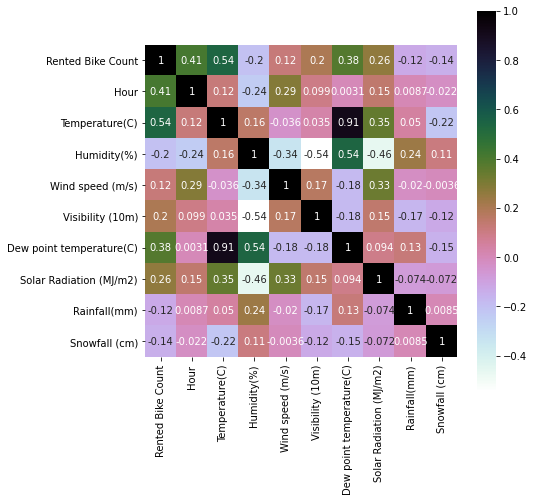

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r',square=True) 


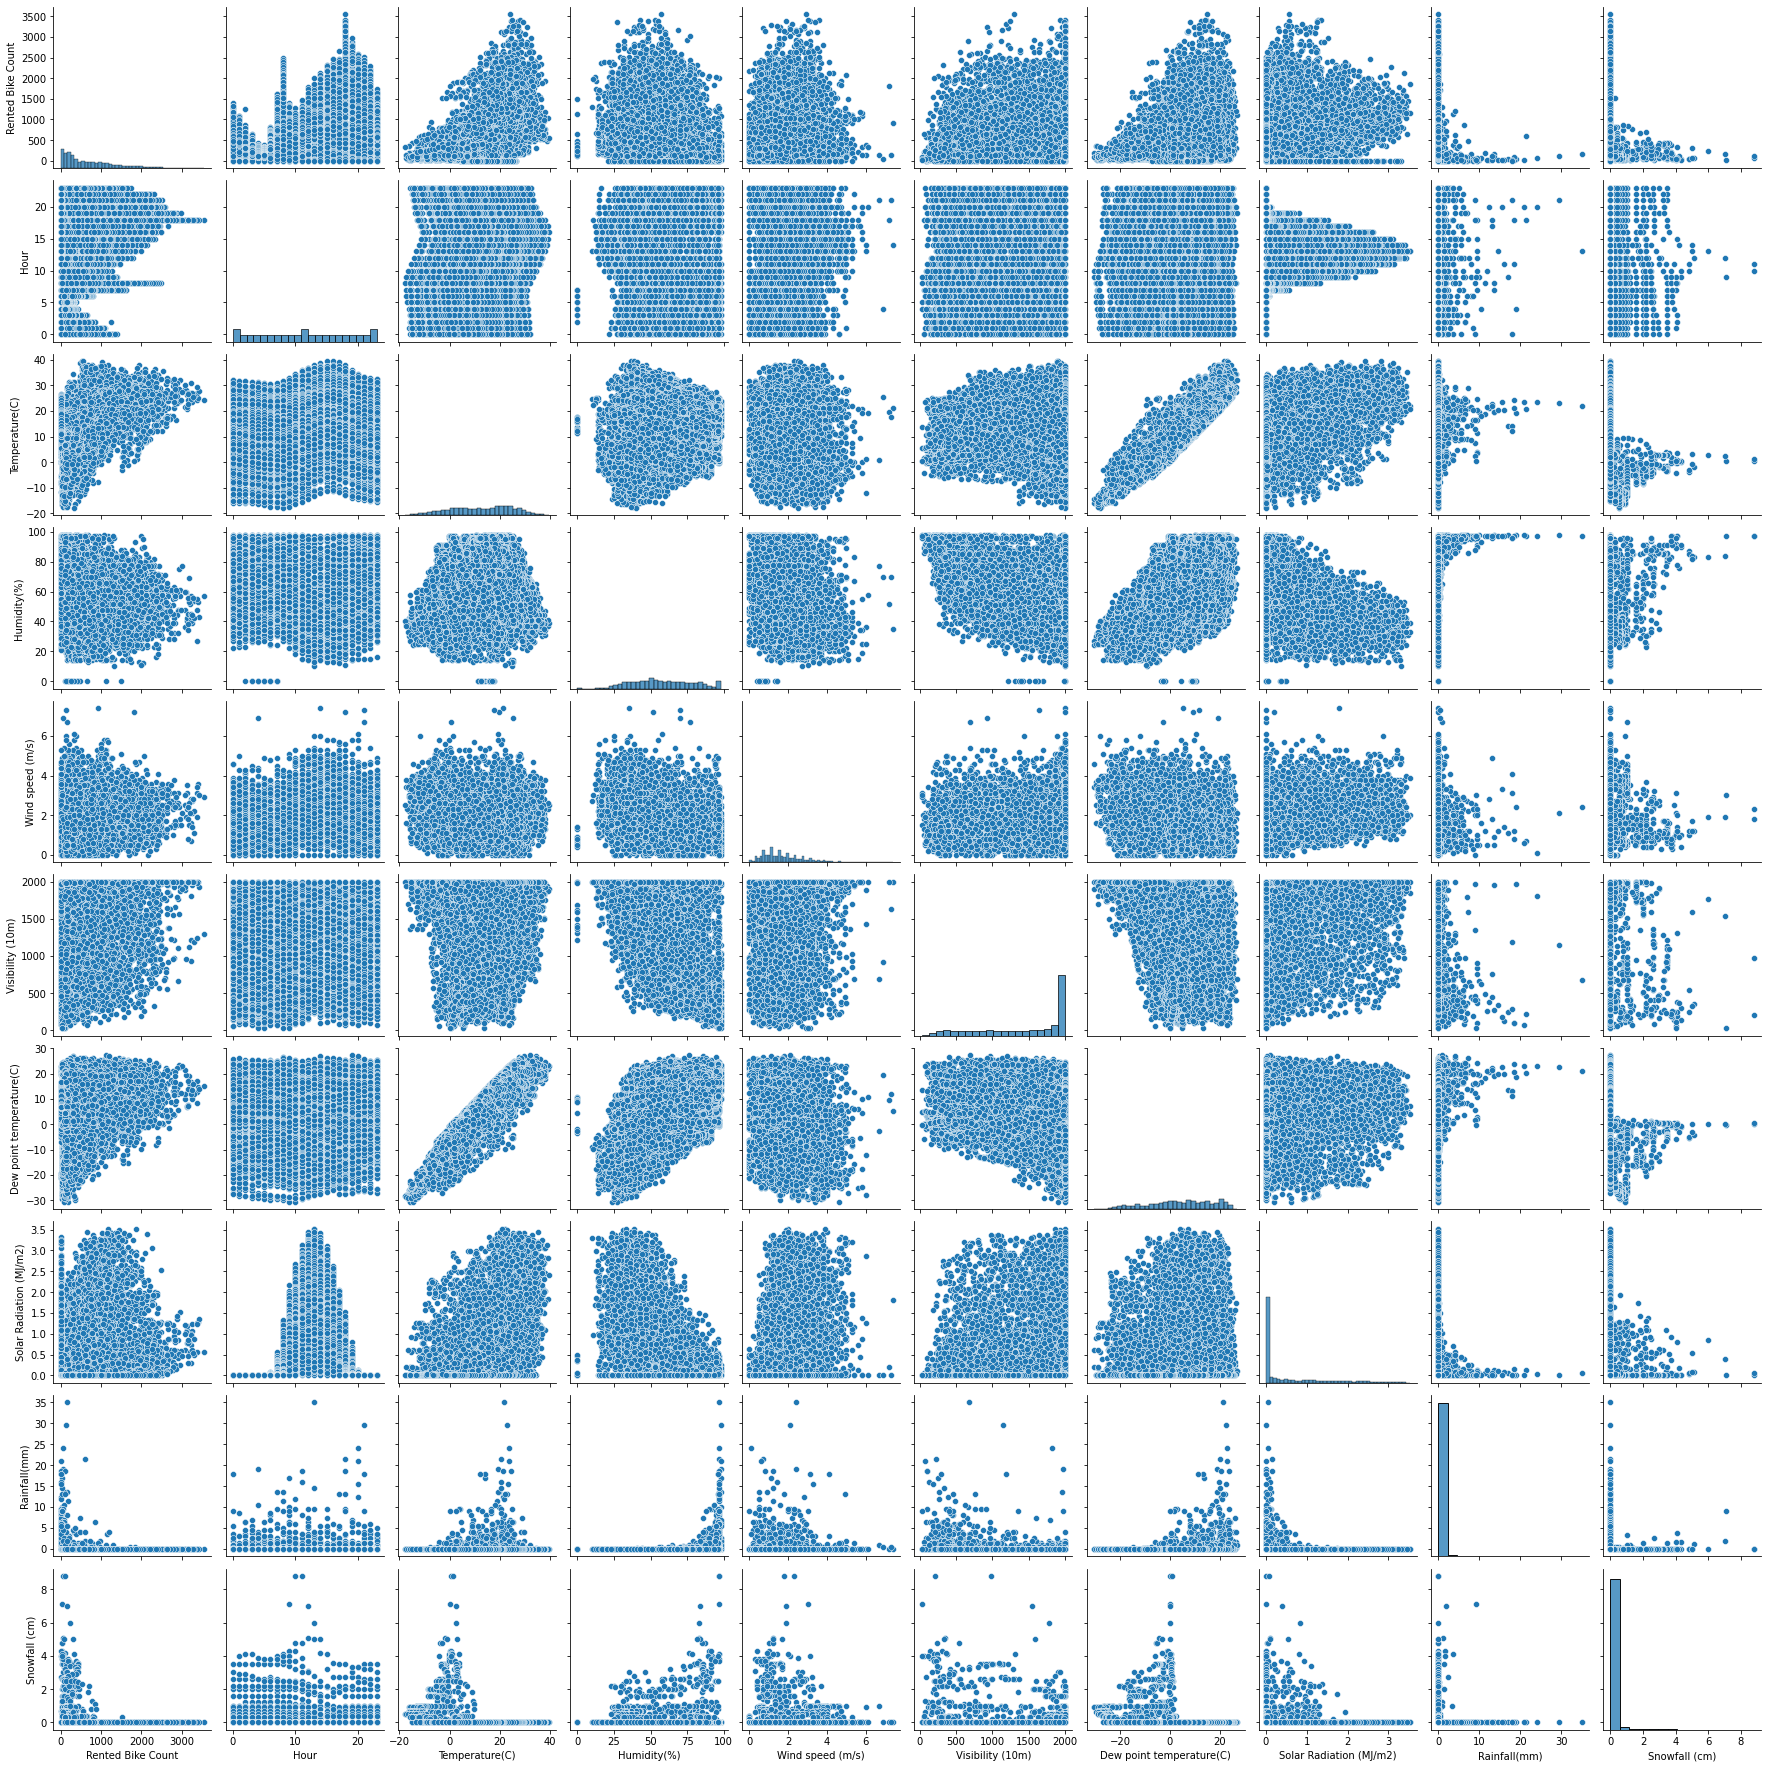

In [11]:
sns.pairplot(df)

In [12]:
def add_to_drop(list_to_drop,col):
    
    if  col not in list_to_drop:
        list_to_drop.append(col)
    else:
        print(f"{col} already in list )")
        
    return list_to_drop

In [13]:
def plot_lineplot(data,y,x,hue=None,style=None):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df,x=x,y= target, hue=hue, style=style)
    plt.show()

In [14]:
target = "Rented Bike Count"
drop_col = []

In [15]:
add_to_drop(drop_col,"Date")

['Date']

In [16]:
drop_col

['Date']

# TARGET VS HOUR

## - The data shows that the most active time is between the 15th and 20th hour of the day

## - Summer has the most customers followed by Autumn and Spring

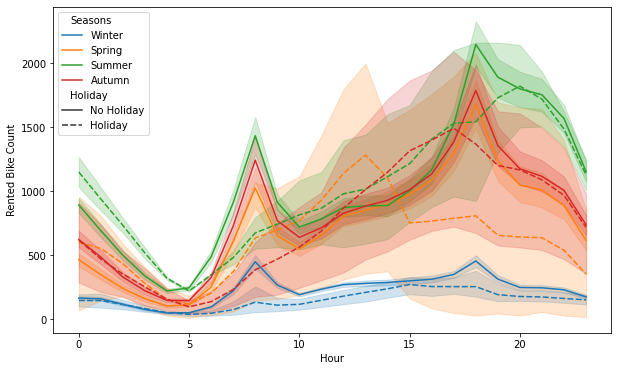

In [17]:
x = 'Hour'
plot_lineplot(df,y=target,x=x,style = "Holiday",hue = "Seasons")

# Vs Temperature 
## - 15 - 35 will get the most traffic
## - 0.9127982187579919 is the correlation betweeb Temperature and Dew point temperature
### both is not nessary (dew point is getting dropped)


In [18]:
df["Temperature(C)"].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(C), dtype: float64

In [19]:
df = df[df['Temperature(C)'] > 0]


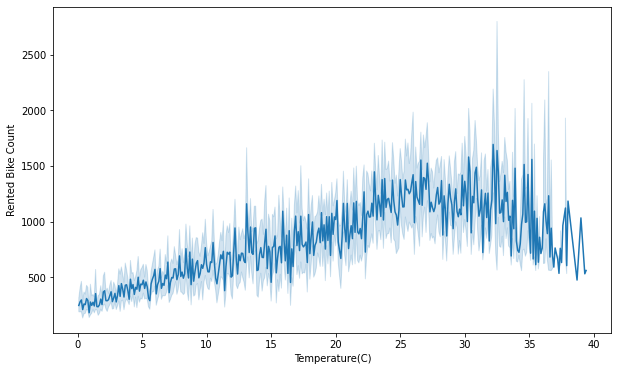

In [20]:
x = 'Temperature(C)'
plot_lineplot(data=df,y=target,x=x)


<AxesSubplot:xlabel='Temperature(C)', ylabel='Rented Bike Count'>

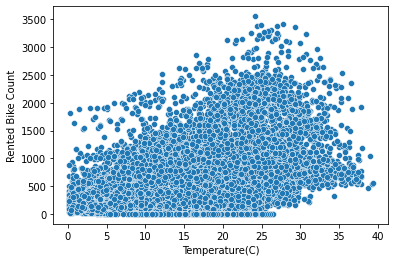

In [21]:
sns.scatterplot(data=df,y=target,x=x)

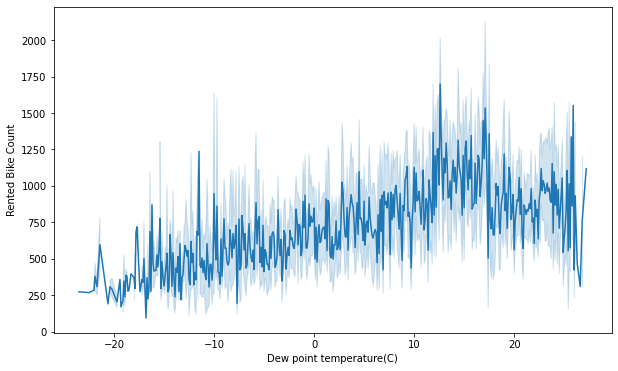

In [22]:
x = 'Dew point temperature(C)'
plot_lineplot(df,y=target,x=x)

In [23]:
df["Temperature(C)"].corr(df["Dew point temperature(C)"])

0.8468886836936498

In [24]:
add_to_drop(drop_col,x)

['Date', 'Dew point temperature(C)']

#  vs Humidity(%) 

In [25]:
x = "Humidity(%)"


In [26]:
df[x].describe()

count    7306.000000
mean       60.430742
std        20.273170
min         0.000000
25%        45.000000
50%        60.000000
75%        76.000000
max        98.000000
Name: Humidity(%), dtype: float64

In [27]:
df = df[df[x] > 30]

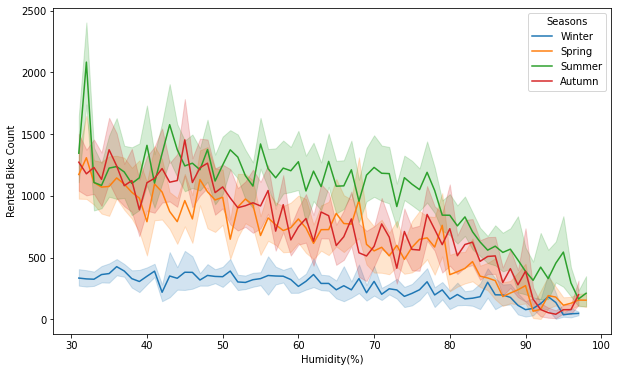

In [28]:
plot_lineplot(df,y=target,x=x,hue="Seasons")

In [29]:
#sns.scatterplot(data=df,y=target,x=x)

# Vs Wind Speed

## - Wind speed over 5 can be an outlier

In [30]:
df["Wind speed (m/s)"].describe()

count    6785.000000
mean        1.631466
std         0.977616
min         0.000000
25%         0.900000
50%         1.500000
75%         2.200000
max         7.400000
Name: Wind speed (m/s), dtype: float64

In [31]:
df = df[df["Wind speed (m/s)"] <= 5]

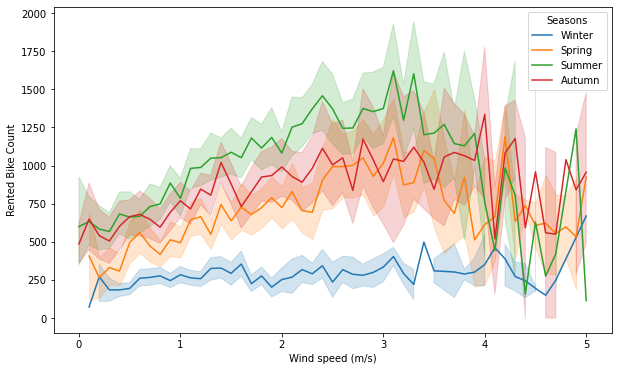

In [32]:
x = "Wind speed (m/s)"
plot_lineplot(df,y=target,x=x,hue="Seasons")

In [33]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Vs Rainfall(mm),Snowfall (cm)

## - People will ride in difficult weater if the weather is more hot

In [34]:
x=["Rainfall(mm)","Snowfall (cm)"]

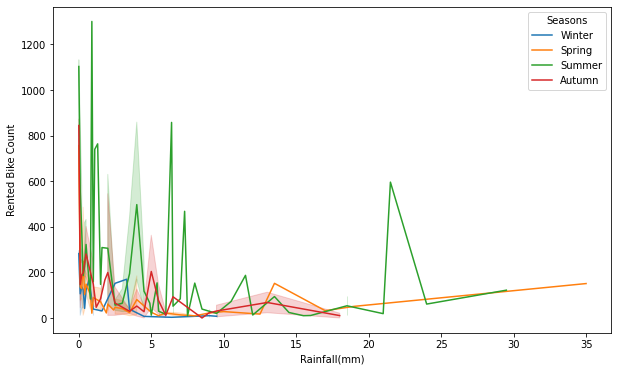

In [35]:
plot_lineplot(df,y=target,x=x[0],hue="Seasons")

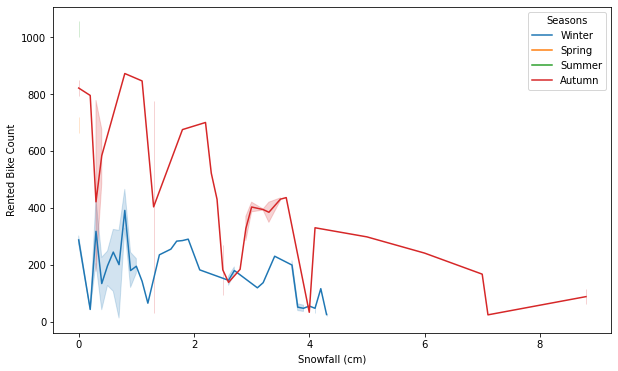

In [36]:
plot_lineplot(df,y=target,x=x[1],hue="Seasons")

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 15 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6763 non-null   object 
 1   Rented Bike Count         6763 non-null   int64  
 2   Hour                      6763 non-null   int64  
 3   Temperature(C)            6763 non-null   float64
 4   Humidity(%)               6763 non-null   int64  
 5   Wind speed (m/s)          6763 non-null   float64
 6   Visibility (10m)          6763 non-null   int64  
 7   Dew point temperature(C)  6763 non-null   float64
 8   Solar Radiation (MJ/m2)   6763 non-null   float64
 9   Rainfall(mm)              6763 non-null   float64
 10  Snowfall (cm)             6763 non-null   float64
 11  Seasons                   6763 non-null   object 
 12  Holiday                   6763 non-null   object 
 13  Functioning Day           6763 non-null   object 
dtypes: floa

In [38]:
col = ["Functioning Day","Holiday","Seasons"]

for c in col:
    add_to_drop(drop_col,c)

In [39]:
df1 = df.copy()

In [40]:
df1.drop(drop_col,1, inplace=True)

In [41]:
df1 = pd.get_dummies(df1,drop_first=True)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 15 to 8759
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        6763 non-null   int64  
 1   Hour                     6763 non-null   int64  
 2   Temperature(C)           6763 non-null   float64
 3   Humidity(%)              6763 non-null   int64  
 4   Wind speed (m/s)         6763 non-null   float64
 5   Visibility (10m)         6763 non-null   int64  
 6   Solar Radiation (MJ/m2)  6763 non-null   float64
 7   Rainfall(mm)             6763 non-null   float64
 8   Snowfall (cm)            6763 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 528.4 KB


In [43]:
df1.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        6763.000000  6763.000000     6763.000000  6763.000000   
mean          797.658288    11.519296       16.825033    63.310217   
std           662.668739     7.006253        9.311635    18.071587   
min             0.000000     0.000000        0.100000    31.000000   
25%           256.000000     5.000000        8.900000    49.000000   
50%           657.000000    11.000000       17.500000    63.000000   
75%          1167.500000    18.000000       24.150000    78.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
count       6763.000000       6763.000000              6763.000000   
mean           1.617773       1357.185125                 0.565508   
std            0.948270        628.524593                 0.865358   
min            0.000000         27.000000                 0.000000   
25%            0.900000        791.000000                 0.000000   
50%            1.400000       1528.000000                 0.020000   
75%            2.200000       1994.000000                 0.920000   
max            5.000000       2000.000000                 3.520000   

       Rainfall(mm)  Snowfall (cm)  
count   6763.000000    6763.000000  
mean       0.190478       0.036079  
std        1.279968       0.353768  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       35.000000       8.800000

<Figure size 1152x288 with 0 Axes>

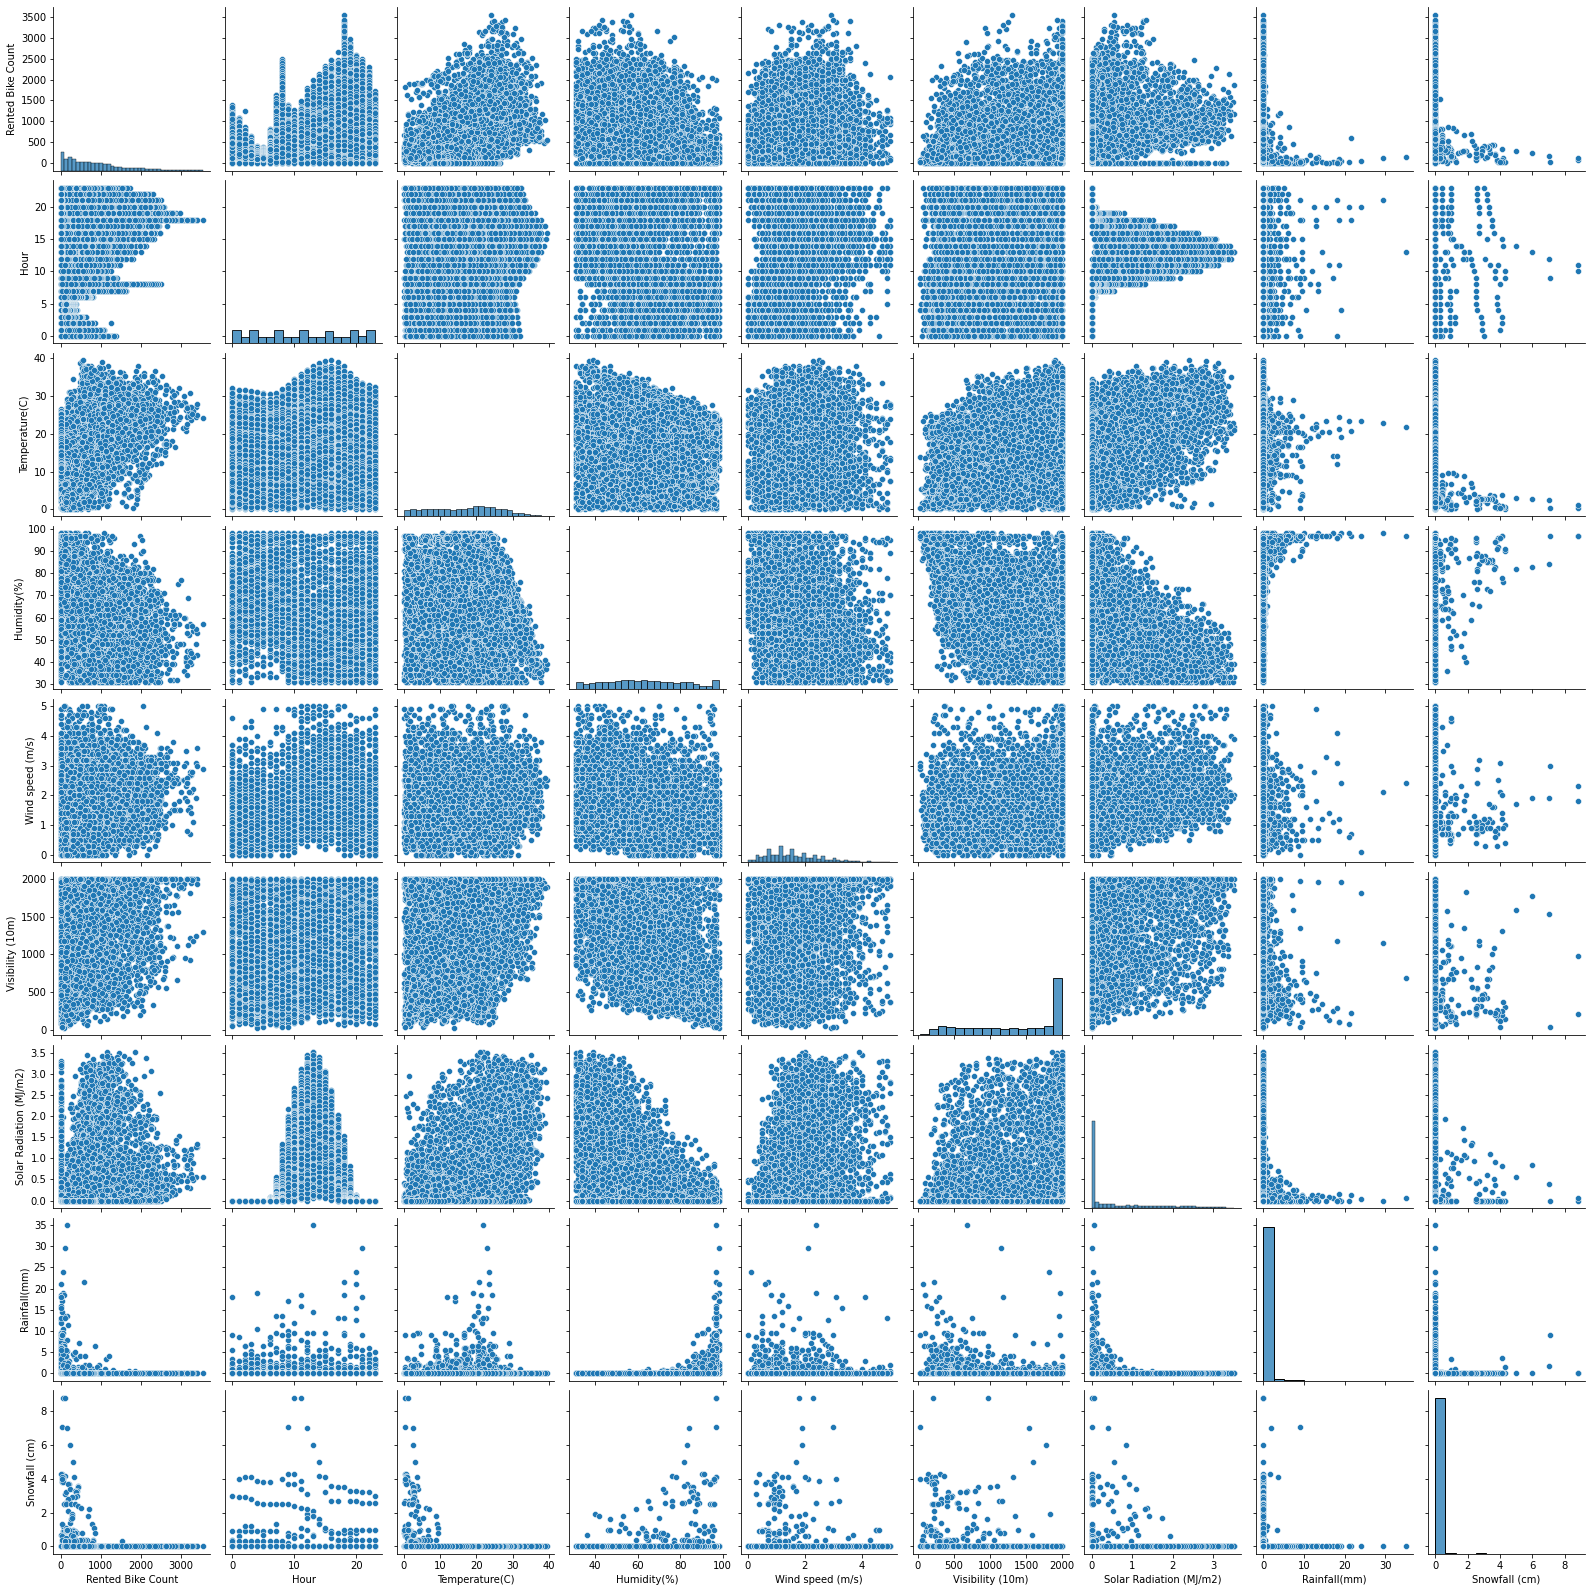

In [44]:
plt.figure(figsize=(16,4))
sns.pairplot(df1)

### SCALING THE DATA

In [45]:
df1.head()

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
15                463    15             2.1           36               3.2   
16                484    16             1.2           54               4.2   
17                555    17             0.8           58               1.6   
18                862    18             0.6           66               1.4   
35                388    11             1.9           49               1.8   

    Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
15              2000                     0.54           0.0            0.0  
16               793                     0.24           0.0            0.0  
17              2000                     0.08           0.0            0.0  
18              2000                     0.00           0.0            0.0  
35              1406                     1.00           0.0            0.0

In [46]:
t = "Rented Bike Count"
y = df1[t]
X = df1.drop(t,1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
Xs = scaler.fit_transform(X)

# Training Model

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xs,y, test_size=0.25)



In [50]:
from scipy.stats import poisson
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [51]:
models = [LinearRegression(),
          Ridge(),
          Lasso(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),]

In [52]:
import sklearn
from sklearn.model_selection import GridSearchCV


In [53]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=7)
    pred = model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring="neg_mean_squared_error")
    cv_score = pred.mean()
    print("Model:",model)
    print("CV score",abs(cv_score))

In [54]:
# sorted(sklearn.metrics.SCORERS.keys())

In [55]:
for model in models:
    train(model)

Model: LinearRegression()
CV score 249991.92581262076
Model: Ridge()
CV score 250057.90949135783
Model: Lasso()
CV score 250904.2420555109
Model: DecisionTreeRegressor()
CV score 216600.3218509648
Model: RandomForestRegressor()
CV score 110491.5905256844
Model: GradientBoostingRegressor()
CV score 117923.94311803947


In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [57]:
model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=2, 
                               random_state=26,
                               n_jobs = -1)

In [59]:
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=26, verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

def evaluate(model, testx, testy):
    y_pred = model.predict(testx)
    errors = abs(y_pred - testy)    
    print('Model Performance')
    print('Mean Absolute Error of linear regression:',mean_absolute_error(testy, y_pred))
    print('Mean Square Error of linear regression:', mean_squared_error(testy,y_pred))
    print('R_Squared Score of linear regression:', r2_score(testy,y_pred))
    print()
    
    #return accuracy

In [62]:
print("*"*20)
print('Base')
print("*"*20)

base_model = RandomForestRegressor()
base_model.fit(xtrain, ytrain)
base_accuracy = evaluate(base_model, xtest, ytest)

print("*"*20)
print("Best")

print("*"*20)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X, y)

#print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


********************
Base
********************
Model Performance
Mean Absolute Error of linear regression: 230.7957007687759
Mean Square Error of linear regression: 139356.6647303962
R_Squared Score of linear regression: 0.6763180306864455

********************
Best
********************
Model Performance
Mean Absolute Error of linear regression: 523.9712629570898
Mean Square Error of linear regression: 397218.77824208705
R_Squared Score of linear regression: 0.09530742580937546



In [63]:
y_pred = base_model.predict(xtest)

In [64]:
df_res = pd.DataFrame()

In [65]:
df_res['Actual'] = ytest
df_res['Prediction'] = y_pred
df_res['Error'] = abs(ytest - y_pred)
df_res

Actual  Prediction    Error
7000       0     1924.62  1924.62
8186     136      349.61   213.61
5944     818      832.25    14.25
7286       0      650.95   650.95
4736     892     1453.36   561.36
...      ...         ...      ...
7190    1972     1620.01   351.99
6796     188      213.54    25.54
3069     443      618.43   175.43
6267     425      351.09    73.91
4357    1151     1256.56   105.56

[1691 rows x 3 columns]

<AxesSubplot:xlabel='Prediction', ylabel='Actual'>

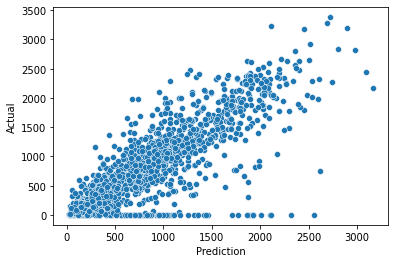

In [66]:
sns.scatterplot(data=df_res,x='Prediction',y='Actual')
